# Q1. Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

(a) Batch Gradient Descent

In [2]:
def J(X: np.ndarray, Y: np.ndarray, theta: np.ndarray):
    # X@theta == np.dot(X,theta)
    # X = np.column_stack((np.ones(len(Y)),X))
    sq_diff = (X@theta - Y)**2
    return sq_diff.mean()/2

def std_normalize(X: np.ndarray):
    return (X-X.mean())/X.std()

In [3]:
def gradientDescent(X: np.ndarray, Y: np.ndarray, theta: np.ndarray, eta=0.01, num_iter=10000, stopp=0.0001):
    theta_history = [theta]

    t = 0
    while t < num_iter:
        grad = X.T@(X@theta-Y)/len(Y)

        theta_new = theta - eta*grad

        if abs(theta - theta_new).max() < stopp:
            break
        theta = theta_new
        theta_history.append(theta)
        t += 1

    return theta_history


In [4]:
X_train = np.loadtxt("../data/q1/linearX.csv")
Y_train = np.loadtxt("../data/q1/linearY.csv")
m = len(Y_train)

X_norm = std_normalize(X_train)
Y_norm = std_normalize(Y_train)

X = np.column_stack([np.ones(m),X_norm])
Y = Y_norm.reshape(-1,1)

In [5]:
# cost at initialization

J(X,Y_norm,np.zeros(2))

0.5000000000000001

In [6]:
theta_0 = np.zeros(2).reshape(-1,1)

theta_grad = gradientDescent(X,Y,theta_0)[-1]
theta_grad = theta_grad.astype(float)

print(theta_grad)

[[-5.90048455e-14]
 [ 6.45152452e-01]]


(b) Plot of Data vs Hypothesis function

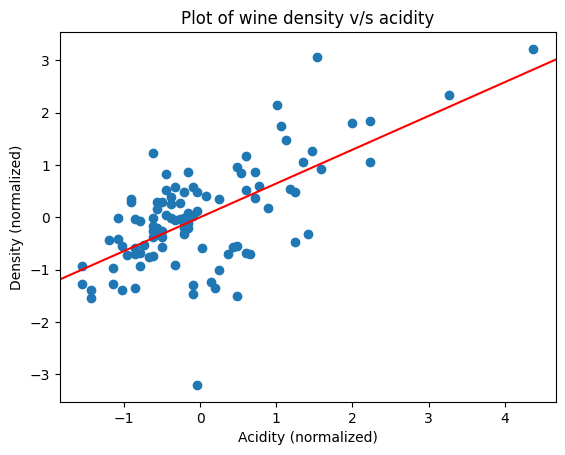

In [7]:
plt.scatter(x=X_norm, y=Y_norm)
plt.xlabel("Acidity (normalized)")
plt.ylabel("Density (normalized)")
plt.title("Plot of wine density v/s acidity")

# plot of Hypothesis function
plt.axline(xy1=(0,theta_grad[0][0]), slope=theta_grad[1][0], color="red")

(c) Error function Mesh graph

In [8]:
import matplotlib.animation as anime
from mpl_toolkits import mplot3d

gif is cropped, why??

In [9]:
def animator(fig, ax, arr1, arr2, arr3=[], gif_add="fig.gif"):
    # delay of 0.2s => 5 fps
    writer = anime.PillowWriter(fps=5)

    x1_prog = []
    x2_prog = []
    x3_prog = []
    n_frames = len(arr1)

    with writer.saving(fig, gif_add, dpi=150):
        for i in range(n_frames):
            x1_prog.append(arr1[i])
            x2_prog.append(arr2[i])
            
            if len(arr3):
                x3_prog.append(arr3[i])
                ax.plot(x1_prog, x2_prog, x3_prog, marker='.',color='r')
            else:
                ax.plot(x1_prog, x2_prog, marker='.',color='r')
            writer.grab_frame()

In [10]:
J_vec = np.vectorize(J, signature='(m,2),(m,1),(2,1)->()')

t0_space = np.linspace(-1,1,50)
t1_space = np.linspace(-0.5,1.5,50)
t_meshgrid = np.meshgrid(t0_space, t1_space)
t_space  = np.stack(t_meshgrid, axis=2).reshape((50,50,2,1))

cost_mesh = J_vec(X, Y, t_space)

In [11]:
theta_history = gradientDescent(X,Y,theta_0)
path = theta_history[::20]

t0_space = t_meshgrid[0]
t1_space = t_meshgrid[1]

conv_x, conv_y = np.stack(path,axis=0).reshape((len(path),2)).T
conv_z = J_vec(X,Y,np.array(path))

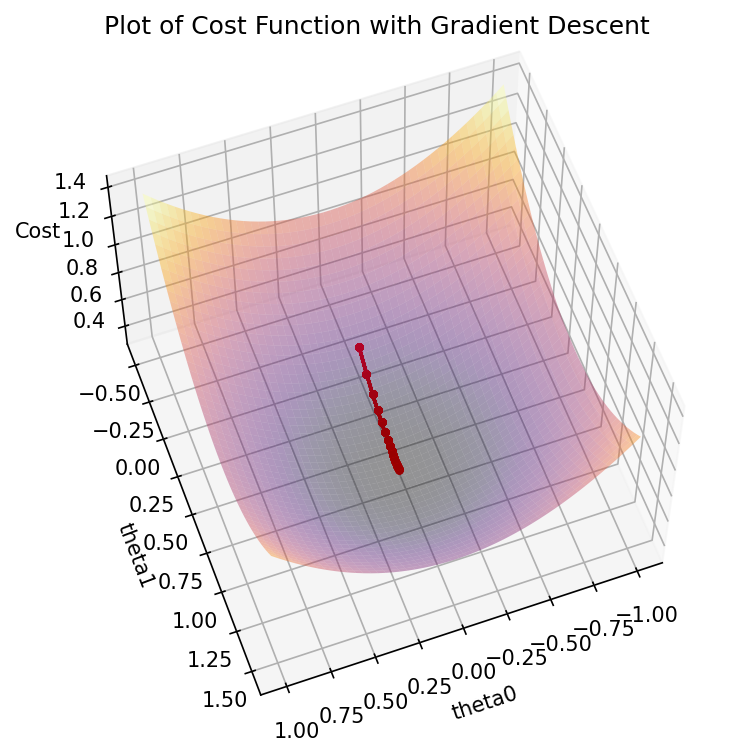

In [12]:
fig = plt.figure(figsize=(5,5), dpi=150)
ax = plt.axes(projection='3d')

ax.view_init(elev=60, azim=70)
ax.plot_surface(t0_space, t1_space, cost_mesh, cmap='inferno', alpha=0.4)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')

ax.set_title("Plot of Cost Function with Gradient Descent ")

fig.tight_layout()

animator(fig,ax,conv_x,conv_y,conv_z,gif_add="./plots/q1c_mesh.gif")

In [13]:
# theta0_vals = np.linspace(-2, 2, 100)
# theta1_vals = np.linspace(-2, 2, 100)
# theta0_mesh, theta1_mesh = np.meshgrid(theta0_vals, theta1_vals)

# # check tis bro
# vector_J = np.vectorize(J, signature="(m,),(m,),()->()")
# error_matrix = vector_J(X_norm,Y_norm,[theta0_mesh,theta1_mesh])

(d) Contours from Gradient Descent

In [14]:
t0_space = np.linspace(-0.5,0.5,50)
t1_space = np.linspace(-0.2,0.8,50)
t_meshgrid = np.meshgrid(t0_space, t1_space)
t_space  = np.stack(t_meshgrid, axis=2).reshape((50,50,2,1))
cost_mesh = J_vec(X, Y, t_space)

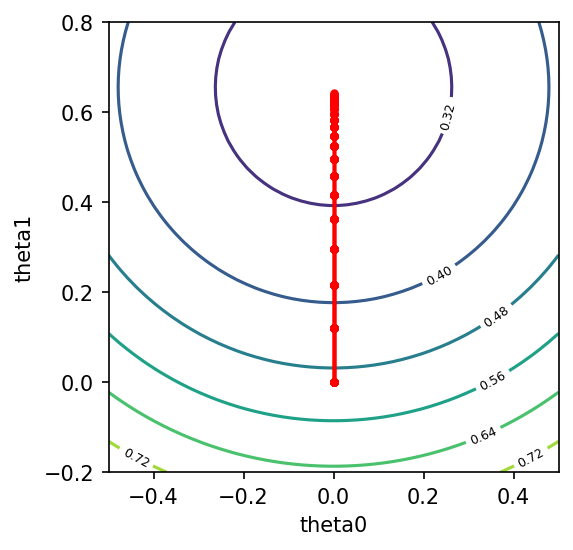

In [15]:
fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_axes([0,0,1,1])

contour_plot = plt.contour(t0_space, t1_space, cost_mesh)
plt.clabel(contour_plot, colors = 'k', fontsize=6)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')

conv_x, conv_y = np.stack(path,axis=0).reshape((len(path),2)).T

animator(fig,ax,conv_x,conv_y,gif_add="./plots/q1d_contour_001.gif")

(e) Contours for varying eta = [0.001, 0.025, 0.1]

In [16]:
# eta = 0.001

theta_history = gradientDescent(X,Y,theta_0,eta=0.001)
print("Current theta:", theta_history[-1])
print("Current Cost = ", J(X,Y,theta_history[-1]))
print("Original Cost = ", J(X,Y,theta_grad))

Current theta: [[-5.07147602e-14]
 [ 5.55102091e-01]]
Current Cost =  0.2904415328698599
Original Cost =  0.2854944222787019


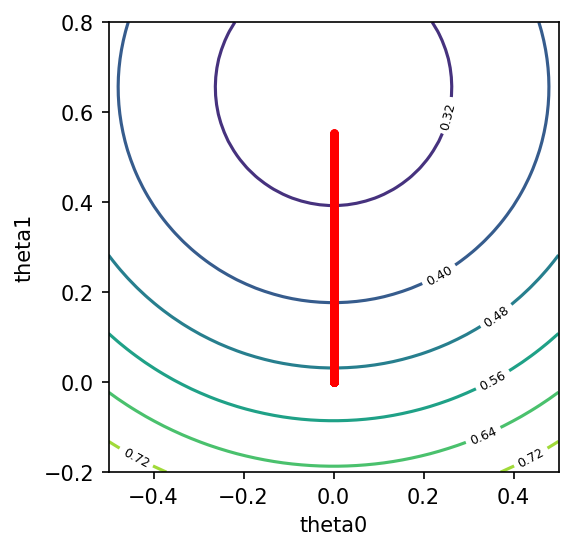

In [17]:
path = theta_history[::10]

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_axes([0,0,1,1])

contour_plot = plt.contour(t0_space, t1_space, cost_mesh)
plt.clabel(contour_plot, colors = 'k', fontsize=6)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')

conv_x, conv_y = np.stack(path,axis=0).reshape((len(path),2)).T

animator(fig,ax,conv_x,conv_y,gif_add="./plots/q1e_contour_0001.gif")

In [18]:
# eta = 0.025

theta_history = gradientDescent(X,Y,theta_0,eta=0.025)
print("Current theta:", theta_history[-1])
print("Current Cost = ", J(X,Y,theta_history[-1]))
print("Original Cost = ", J(X,Y,theta_grad))

Current theta: [[-5.95599126e-14]
 [ 6.51126964e-01]]
Current Cost =  0.28545305046639446
Original Cost =  0.2854944222787019


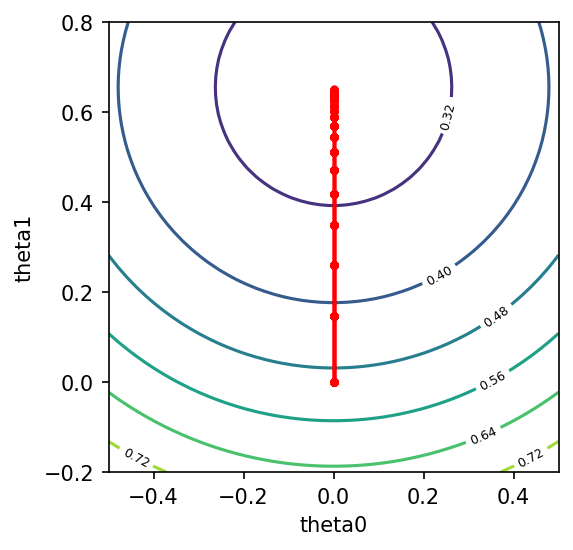

In [19]:
path = theta_history[::10]

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_axes([0,0,1,1])

contour_plot = plt.contour(t0_space, t1_space, cost_mesh)
plt.clabel(contour_plot, colors = 'k', fontsize=6)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')

conv_x, conv_y = np.stack(path,axis=0).reshape((len(path),2)).T

animator(fig,ax,conv_x,conv_y,gif_add="./plots/q1e_contour_0025.gif")


In [20]:
# eta = 0.1

theta_history = gradientDescent(X,Y,theta_0,eta=0.1)
print("Current theta:", theta_history[-1])
print("Current Cost = ", J(X,Y,theta_history[-1]))
print("Original Cost = ", J(X,Y,theta_grad))

Current theta: [[-5.98344707e-14]
 [ 6.54110929e-01]]
Current Cost =  0.2854457532413275
Original Cost =  0.2854944222787019


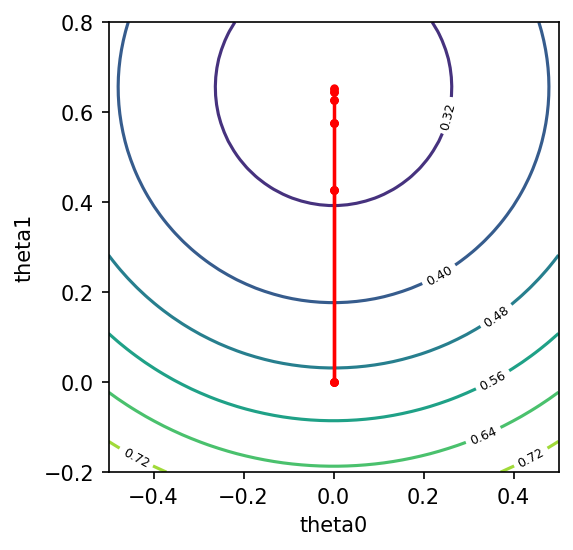

In [21]:
path = theta_history[::10]

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_axes([0,0,1,1])

contour_plot = plt.contour(t0_space, t1_space, cost_mesh)
plt.clabel(contour_plot, colors = 'k', fontsize=6)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')

conv_x, conv_y = np.stack(path,axis=0).reshape((len(path),2)).T

animator(fig,ax,conv_x,conv_y,gif_add="./plots/q1e_contour_01.gif")

Some extras (eta = 2), very high

In [22]:
theta_history = gradientDescent(X,Y,theta_0,eta=2)
print("Current theta:", theta_history[-1])
print("Current Cost = ", J(X,Y,theta_history[-1]))
print("Original Cost = ", J(X,Y,theta_grad))

Current theta: [[-4.63585836e-12]
 [-1.61559655e-12]]
Current Cost =  0.5000000000010583
Original Cost =  0.2854944222787019


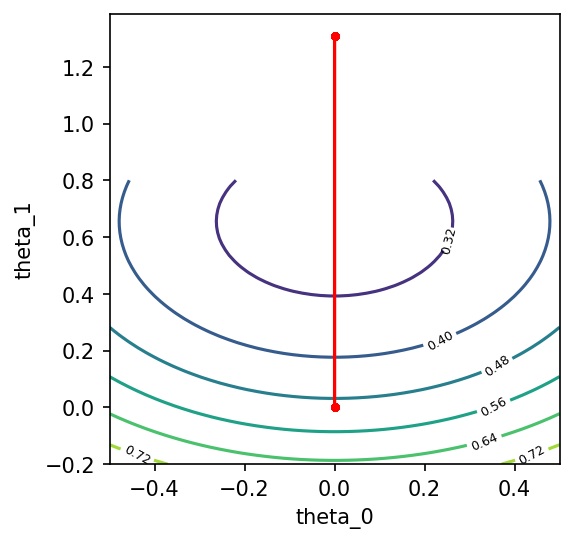

In [23]:
path = theta_history[::5]

fig = plt.figure(figsize=(3,3), dpi=150)
ax = fig.add_axes([0,0,1,1])

contour_plot = plt.contour(t0_space, t1_space, cost_mesh)
plt.clabel(contour_plot, colors = 'k', fontsize=6)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')

conv_x, conv_y = np.stack(path,axis=0).reshape((len(path),2)).T
ax.plot(conv_x, conv_y, marker='.',color='r')